# Kaggle Housing Data

This is note book takes kaggle housing dataset and uses supervised learning techniques to rpredict the price of a house

Before we dig in, there are certain aspects of machine learning algorithms common to all programs. So listed below are the steps commonto all most ML implementations.<br>
<ol> 
    <li>Frame the problem</li> 
    <li>Get Data from sources </li>
    <li>Explore the data</li>
    <li>Data Preprocessing</li>
    <li>Explore different ML models and shortlist the best ones</li>
    <li>Fine tune the model and combine if required</li>
    <li> Present Solution</li>
</ol>
<br>
In this case we already have the first two points defined, Our obkective or problem is to predict the house price given a certain number of features and our source of data is already organized thanks to kaggle. We will directly jump to third step which is Data exploration phase</br>

## Data Exploration

The below cell declares all the import statements used throughout this notebook

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sb
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split

In [2]:
raw_housing_data_train = pd.read_csv('data/train.csv')
raw_housing_data_test = pd.read_csv('data/test.csv')

In the above data, it is already divided into train and test data. But in real life we need to seggerate the same and after seggregation not look into test data ever while exploration

In all there are 81 features. In due course of this notebook, we will look at each ffeature closely and modify, encode or even drop the features as and when we think it is nessecary with proper justification. One thing to keep in mind, is that whatever modifications we do in the training data set we need to do the same modification in our test data set.

In [3]:
raw_housing_data_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  

[5 rows x 81 columns]

Removing the sale price as that is our target variable and storing it in another dataframe.
Since the data is already divided into train and test we do not need to remove the same sale price feature from our test data as this already does not have the same

We will have a just overview of the data we have to gain more insight into this. Once we understand the data we will have a better intuition about how to deal with missing values and non numerical data and as such.<br>
Drawing a graph on all possible values

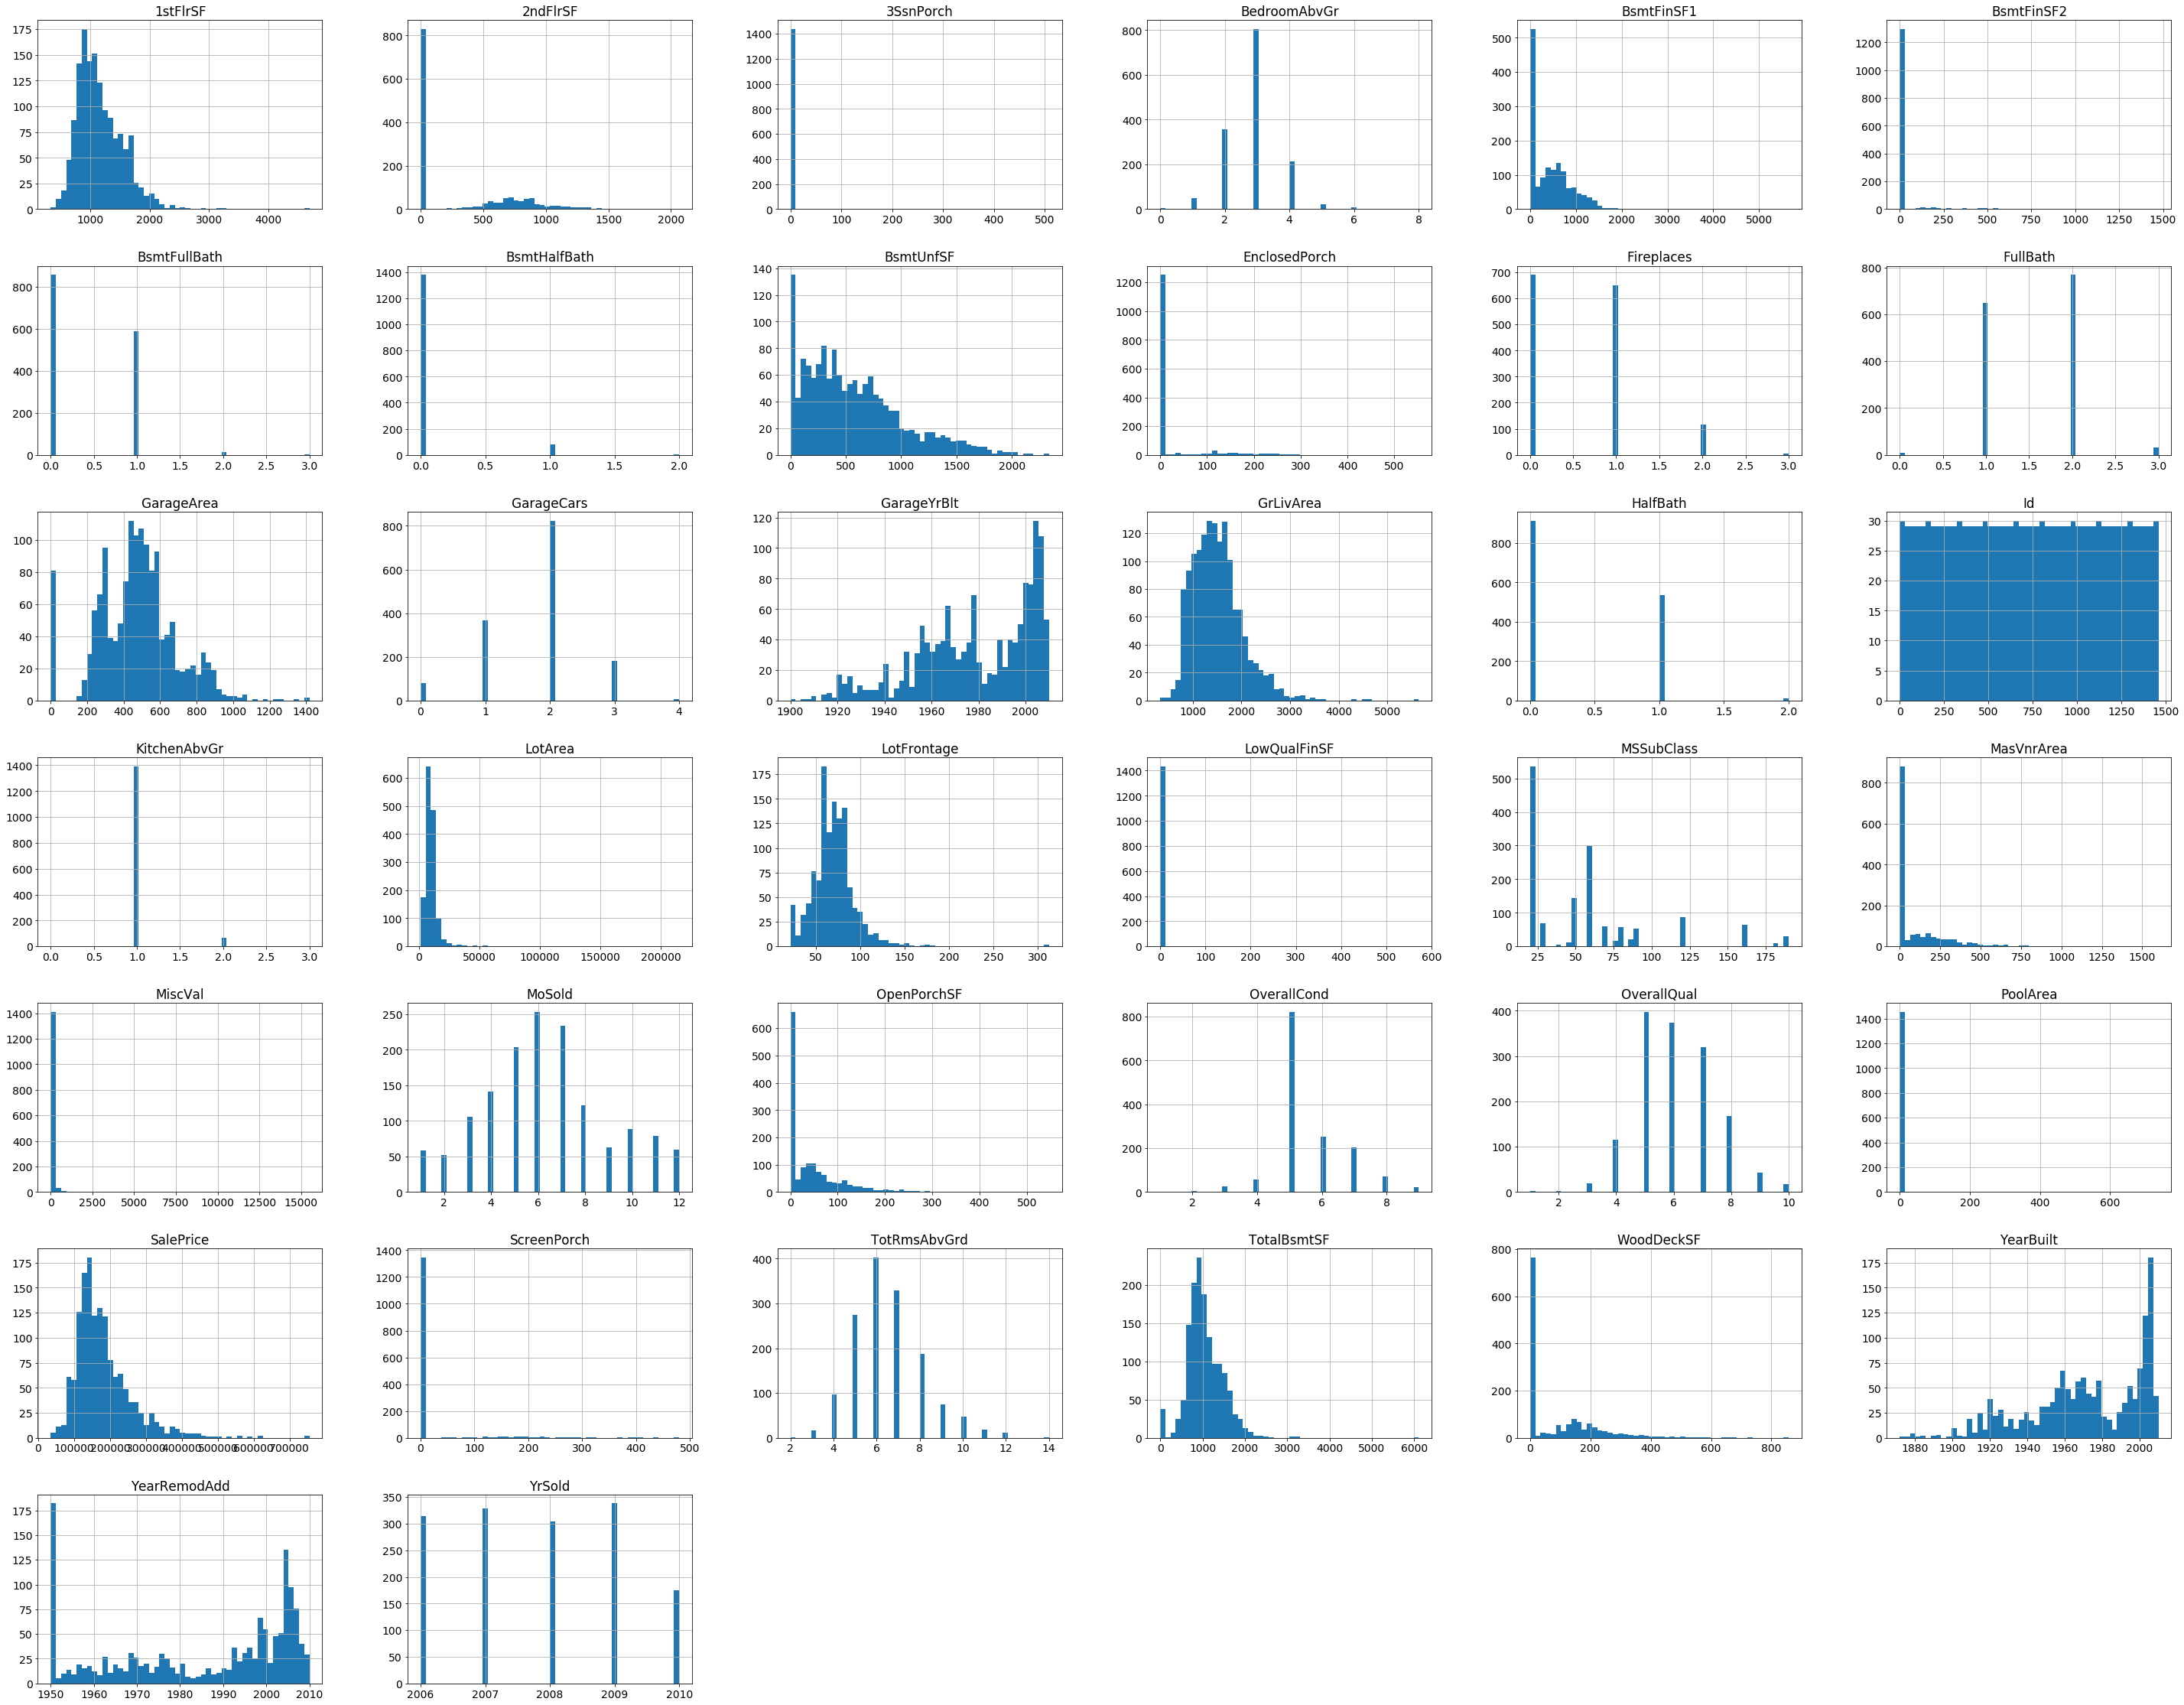

In [4]:
rcParams['font.size'] = 14
rcParams['lines.linewidth'] = 2
rcParams['figure.figsize'] = (50, 40)
raw_housing_data_train.hist(bins=50)
plt.show()

The graphs are plotted only for numerical values. So in the preprocessing stage we need to apply transformation if required. And then we need to take care of non categorical values. We see dome graphs are left skewed and hardly any graph is normal in nature.Next we will just have a look at correlations bewteen values of select few and then we will move to detailed exploration

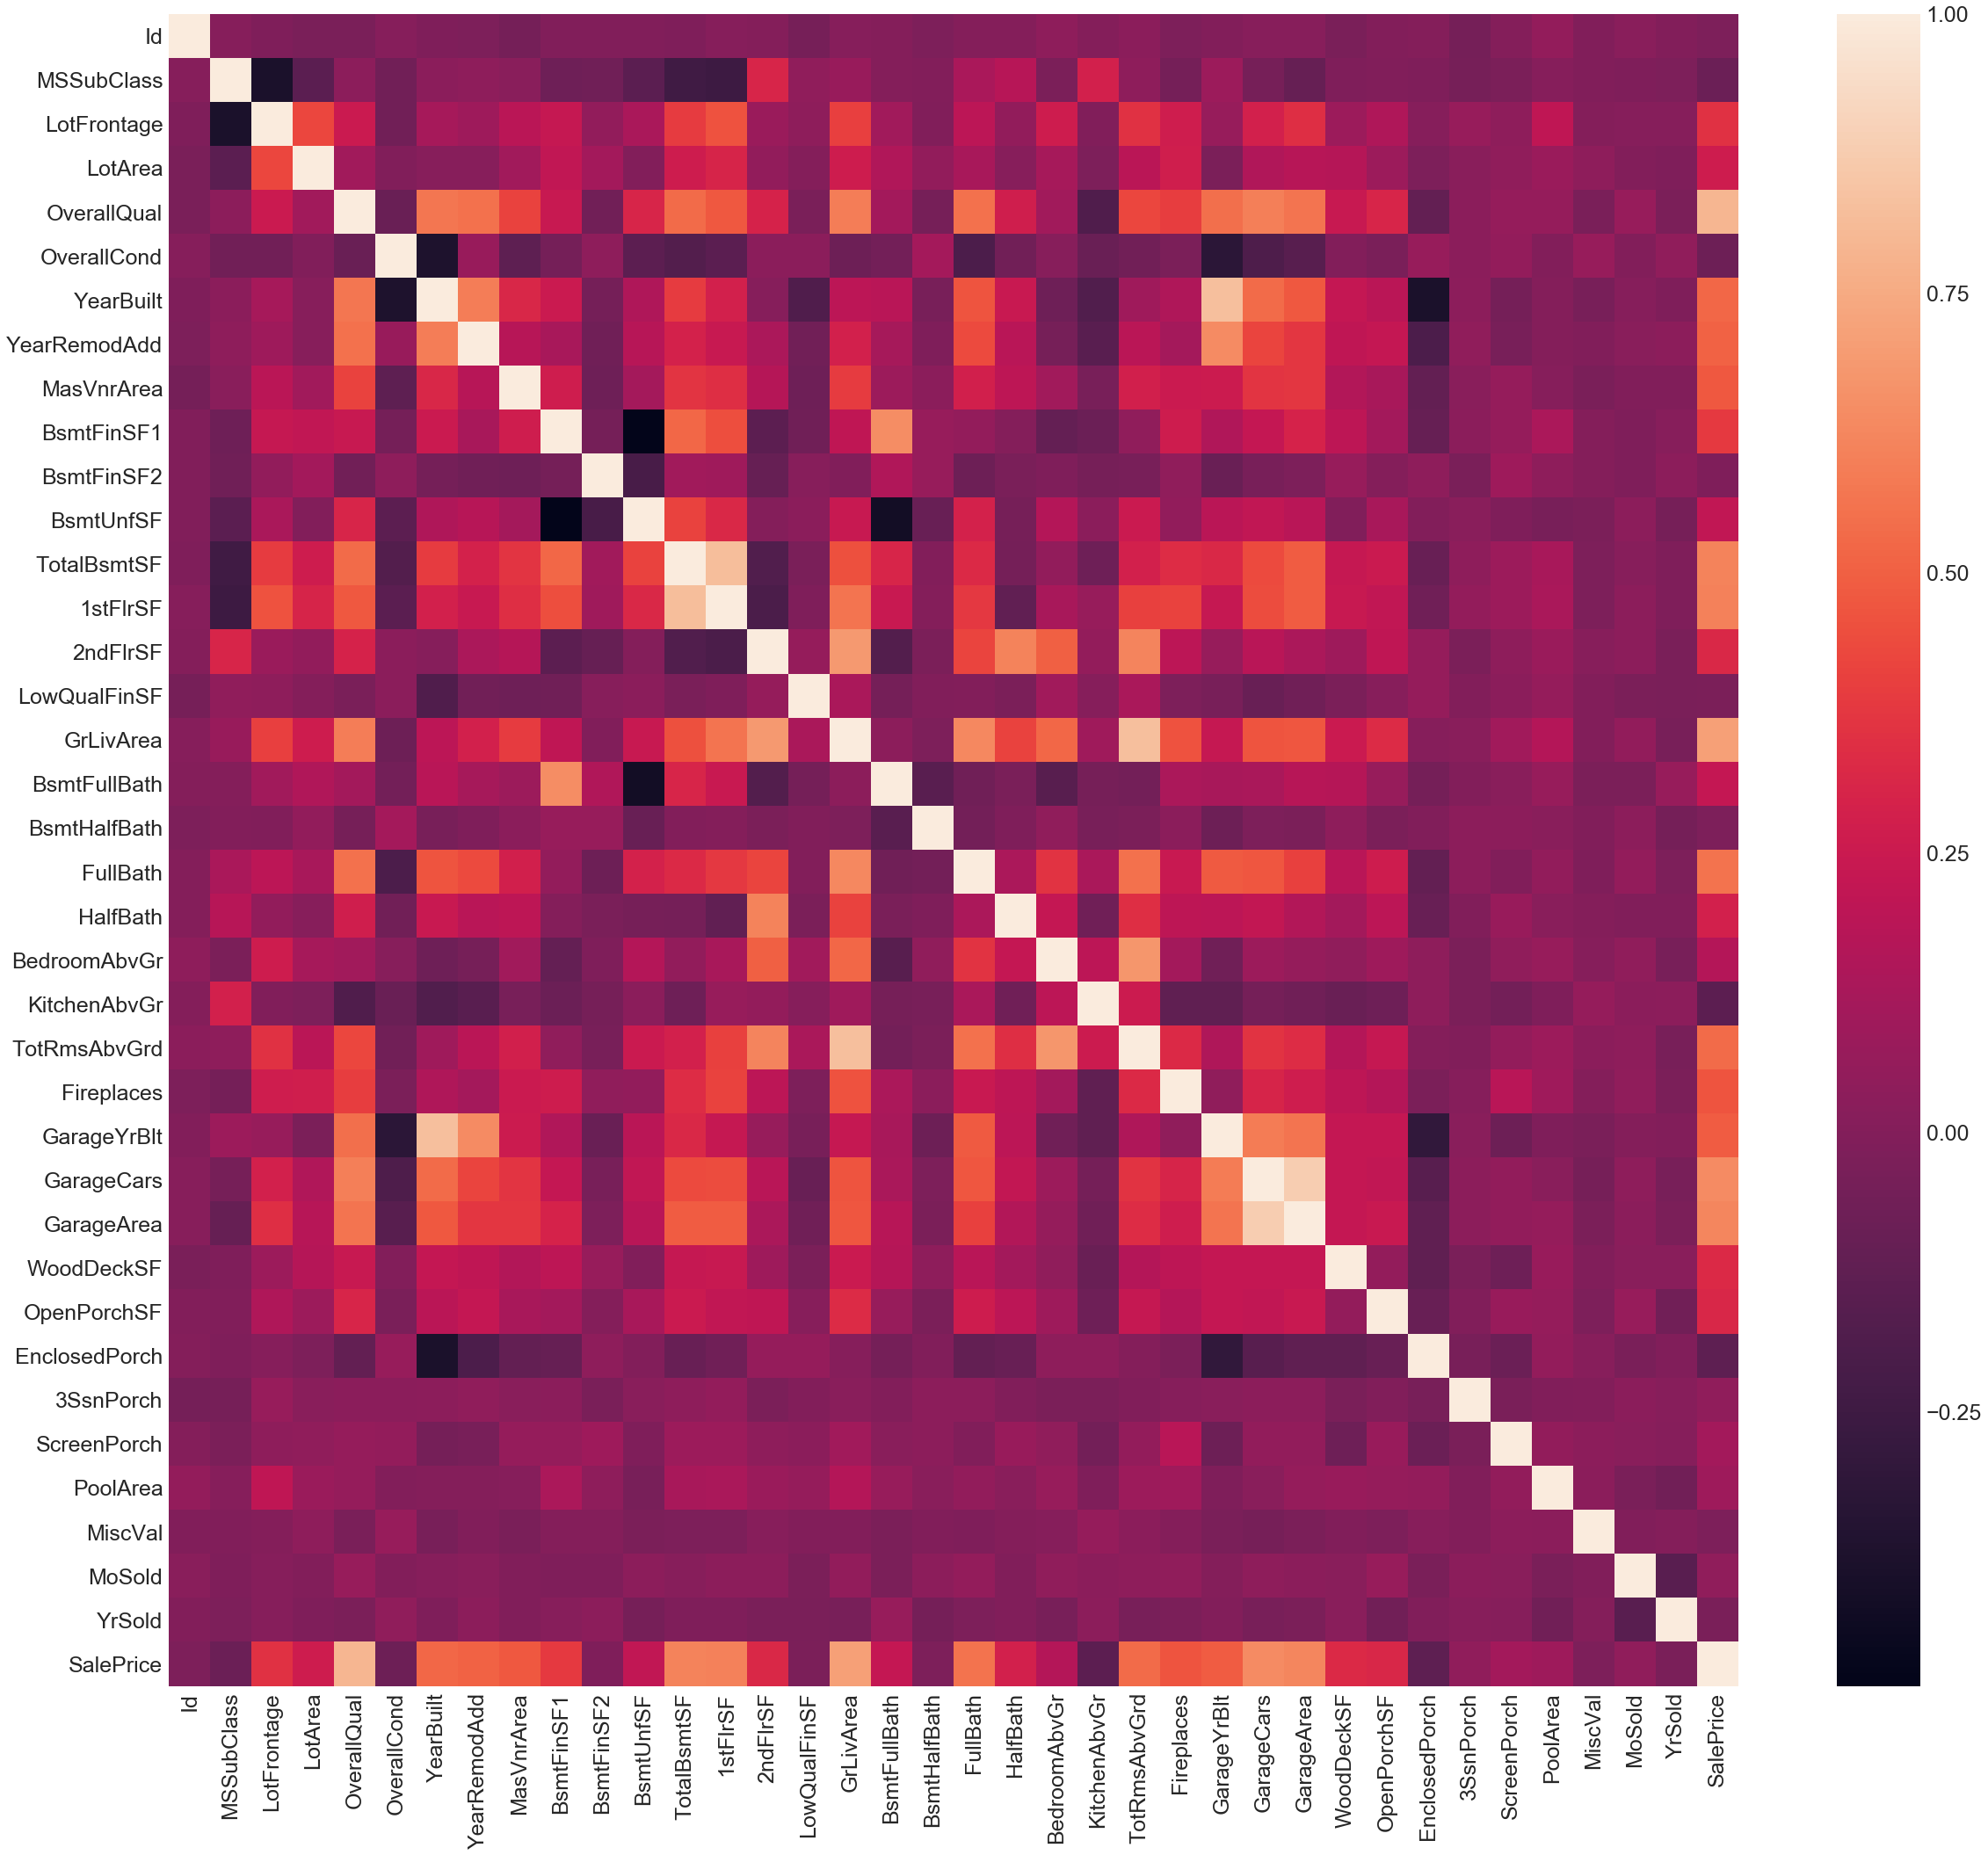

In [5]:
sb.set(font_scale=2.5)
plt.subplots(figsize=(40,35))
corr = raw_housing_data_train.corr()

sb.heatmap(corr, xticklabels=corr.columns.values,yticklabels=corr.columns.values)

Whoa! that is some complicated image we are looking at. This is the correlation matrix of every element with every other element. The diagnal line indicates value of 1 as every attribute correlates to itself as one. For simplicity sake let us consider only the correlation between house sale price and other features.

In [6]:
corr['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

So we see the most influential factors for Sale Price are OverAll Quality,, GrLivAtra, garage Cars, garage Area,Total Basement area and 1st Floor Surface area in descending order. SO we must be very careful while dealing with these five features. Now that we have general idea about the data, we will go about cleaning and make the data ready fro processing by Machine Learning algorithms.<br>
Since there are 80 features in all, we will be go about making changes in small small groups for convinience and simplicity sake

## Data Preprocessing 

First we will deal with all missing data. To that lets have a count of the missing data

In [7]:
raw_housing_data_train.count().sort_values()

PoolQC              7
MiscFeature        54
Alley              91
Fence             281
FireplaceQu       770
LotFrontage      1201
GarageYrBlt      1379
GarageType       1379
GarageFinish     1379
GarageQual       1379
GarageCond       1379
BsmtExposure     1422
BsmtFinType2     1422
BsmtFinType1     1423
BsmtCond         1423
BsmtQual         1423
MasVnrArea       1452
MasVnrType       1452
Electrical       1459
KitchenQual      1460
BedroomAbvGr     1460
HalfBath         1460
FullBath         1460
BsmtHalfBath     1460
TotRmsAbvGrd     1460
BsmtFullBath     1460
KitchenAbvGr     1460
Functional       1460
Id               1460
GrLivArea        1460
                 ... 
Neighborhood     1460
LandSlope        1460
OverallQual      1460
LotConfig        1460
LandContour      1460
LotShape         1460
Street           1460
LotArea          1460
MSZoning         1460
MSSubClass       1460
Utilities        1460
2ndFlrSF         1460
OverallCond      1460
YearRemodAdd     1460
CentralAir

So we see around 5 of these features are having bery less data. We will downright remove those from the training as well as test data.

In [8]:
removalFeatures=['PoolQC','MiscFeature','Alley','Fence','FireplaceQu']
for x in removalFeatures:
    raw_housing_data_train.drop(x,axis=1,inplace=True)
    raw_housing_data_test.drop(x,axis=1,inplace=True)

In [9]:
raw_housing_data_train.LotFrontage.isna==True

False

In [10]:
raw_housing_data_train[raw_housing_data_train['LotFrontage'].isnull()].head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
7    8          60       RL          NaN    10382   Pave      IR1         Lvl   
12  13          20       RL          NaN    12968   Pave      IR2         Lvl   
14  15          20       RL          NaN    10920   Pave      IR1         Lvl   
16  17          20       RL          NaN    11241   Pave      IR1         Lvl   
24  25          20       RL          NaN     8246   Pave      IR1         Lvl   

   Utilities LotConfig    ...     EnclosedPorch 3SsnPorch ScreenPorch  \
7     AllPub    Corner    ...               228         0           0   
12    AllPub    Inside    ...                 0         0         176   
14    AllPub    Corner    ...               176         0           0   
16    AllPub   CulDSac    ...                 0         0           0   
24    AllPub    Inside    ...                 0         0           0   

   PoolArea MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
7         0     350     11    2009        WD         Normal     200000  
12        0       0      9    2008        WD         Normal     144000  
14        0       0      5    2008        WD         Normal     157000  
16        0     700      3    2010        WD         Normal     149000  
24        0       0      5    2010        WD         Normal     154000  

[5 rows x 76 columns]

In [11]:
corr['LotFrontage'].sort_values(ascending=False)

LotFrontage      1.000000
1stFlrSF         0.457181
LotArea          0.426095
GrLivArea        0.402797
TotalBsmtSF      0.392075
TotRmsAbvGrd     0.352096
SalePrice        0.351799
GarageArea       0.344997
GarageCars       0.285691
Fireplaces       0.266639
BedroomAbvGr     0.263170
OverallQual      0.251646
BsmtFinSF1       0.233633
PoolArea         0.206167
FullBath         0.198769
MasVnrArea       0.193458
OpenPorchSF      0.151972
BsmtUnfSF        0.132644
YearBuilt        0.123349
BsmtFullBath     0.100949
YearRemodAdd     0.088866
WoodDeckSF       0.088521
2ndFlrSF         0.080177
GarageYrBlt      0.070250
3SsnPorch        0.070029
HalfBath         0.053532
BsmtFinSF2       0.049900
ScreenPorch      0.041383
LowQualFinSF     0.038469
MoSold           0.011200
EnclosedPorch    0.010700
YrSold           0.007450
MiscVal          0.003368
KitchenAbvGr    -0.006069
BsmtHalfBath    -0.007234
Id              -0.010601
OverallCond     -0.059213
MSSubClass      -0.386347
Name: LotFro

We do not LotFrontage being affected or that can  be imputed frpm any other variable as it has weak correlation with other. So we will fill up the missing values with mean of the lot area

In [12]:
raw_housing_data_train['LotFrontage'].fillna(raw_housing_data_train['LotFrontage'].mean(), inplace=True)

Next focusing on garage variables, one thing observed is all the values are missing for same rows. SO probable garage is missing for those houses. Seeting garage year as 0 and rest with NA.<br>
Similarly for all basement features filling up missing with NA

In [13]:
raw_housing_data_train['GarageType'].replace(np.NaN, 'NA', inplace=True)
raw_housing_data_train['GarageYrBlt'].replace(np.NaN, 0,inplace=True)
raw_housing_data_train['GarageFinish'].replace(np.NaN, 'NA', inplace=True)
raw_housing_data_train['GarageQual'].replace(np.NaN, 'NA', inplace=True)
raw_housing_data_train['GarageCond'].replace(np.NaN, 'NA', inplace=True)

In [14]:
raw_housing_data_train['BsmtExposure'].replace(np.NaN, 'NA', inplace=True)
raw_housing_data_train['BsmtFinType2'].replace(np.NaN, 'NA',inplace=True)
raw_housing_data_train['BsmtFinType1'].replace(np.NaN, 'NA', inplace=True)
raw_housing_data_train['BsmtQual'].replace(np.NaN, 'NA', inplace=True)

In [15]:
raw_housing_data_train[['MasVnrType','MasVnrArea']].head()

MasVnrType  MasVnrArea
0    BrkFace       196.0
1       None         0.0
2    BrkFace       162.0
3       None         0.0
4    BrkFace       350.0

We will replace NaN in Type with None String and Area with 0.0. This to keep in more consistent wiht ext=sting data

In [16]:
raw_housing_data_train['MasVnrType'].replace(np.NaN, 'None', inplace=True)
raw_housing_data_train['MasVnrArea'].replace(np.NaN, 0.0, inplace=True)

Dealing with test missing data similarlym

In [17]:
raw_housing_data_test['LotFrontage'].fillna(raw_housing_data_test['LotFrontage'].mean(), inplace=True)
raw_housing_data_test['GarageType'].replace(np.NaN, 'NA', inplace=True)
raw_housing_data_test['GarageYrBlt'].replace(np.NaN, 0,inplace=True)
raw_housing_data_test['GarageFinish'].replace(np.NaN, 'NA', inplace=True)
raw_housing_data_test['GarageQual'].replace(np.NaN, 'NA', inplace=True)
raw_housing_data_test['GarageCond'].replace(np.NaN, 'NA', inplace=True)
raw_housing_data_test['BsmtExposure'].replace(np.NaN, 'NA', inplace=True)
raw_housing_data_test['BsmtFinType2'].replace(np.NaN, 'NA',inplace=True)
raw_housing_data_test['BsmtFinType1'].replace(np.NaN, 'NA', inplace=True)
raw_housing_data_test['BsmtQual'].replace(np.NaN, 'NA', inplace=True)

In [18]:
raw_housing_data_test['BsmtCond'].replace(np.NaN, 'NA', inplace=True)
raw_housing_data_test['BsmtCond'].replace(np.NaN, 'NA', inplace=True)
raw_housing_data_test['MasVnrType'].replace(np.NaN, 'None', inplace=True)
raw_housing_data_test['MasVnrArea'].replace(np.NaN, 0.0, inplace=True)

In [19]:
raw_housing_data_test['SaleType'].replace(np.NaN, raw_housing_data_test['SaleType'].mode()[0], inplace=True)
raw_housing_data_test['MSZoning'].replace(np.NaN, raw_housing_data_test['MSZoning'].mode()[0], inplace=True)

raw_housing_data_test['Exterior1st'].replace(np.NaN,raw_housing_data_test['Exterior1st'].mode()[0], inplace=True)
raw_housing_data_test['Utilities'].replace(np.NaN,raw_housing_data_test['Utilities'].mode()[0], inplace=True)
raw_housing_data_test['MSZoning'].replace(np.NaN,raw_housing_data_test['MSZoning'].mode()[0], inplace=True)
raw_housing_data_test['BsmtUnfSF'].replace(np.NaN, 0,inplace=True)

In [20]:
raw_housing_data_test['Functional'].replace(np.nan,raw_housing_data_test['Functional'].mode()[0], inplace=True)
raw_housing_data_test['Functional'].replace(np.nan,raw_housing_data_test['Functional'].mode()[0], inplace=True)
raw_housing_data_test['BsmtFullBath'].replace(np.NaN,raw_housing_data_test['BsmtFullBath'].mode()[0], inplace=True)
raw_housing_data_test['BsmtHalfBath'].replace(np.NaN,raw_housing_data_test['BsmtHalfBath'].mode()[0], inplace=True)
raw_housing_data_test['KitchenQual'].replace(np.NaN,raw_housing_data_test['KitchenQual'].mode()[0], inplace=True)
raw_housing_data_test['Exterior2nd'].replace(np.NaN,raw_housing_data_test['Exterior2nd'].mode()[0], inplace=True)
raw_housing_data_test['BsmtFinSF1'].replace(np.NaN,raw_housing_data_test['BsmtFinSF1'].mode()[0], inplace=True)
raw_housing_data_test['BsmtFinSF2'].replace(np.NaN,raw_housing_data_test['BsmtFinSF2'].mode()[0], inplace=True)
raw_housing_data_test['TotalBsmtSF'].replace(np.NaN,raw_housing_data_test['TotalBsmtSF'].mean(), inplace=True)

In [21]:
raw_housing_data_test['GarageCars'].replace(np.NaN, 0,inplace=True)
raw_housing_data_test['GarageArea'].replace(np.NaN, 0,inplace=True)

All null values are taken care of. Let us have a look at number of columns in both training and test data

In [22]:
raw_housing_data_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig    ...     EnclosedPorch 3SsnPorch ScreenPorch PoolArea  \
0    AllPub    Inside    ...                 0         0           0        0   
1    AllPub       FR2    ...                 0         0           0        0   
2    AllPub    Inside    ...                 0         0           0        0   
3    AllPub    Corner    ...               272         0           0        0   
4    AllPub       FR2    ...                 0         0           0        0   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2008        WD         Normal     208500  
1       0      5    2007        WD         Normal     181500  
2       0      9    2008        WD         Normal     223500  
3       0      2    2006        WD        Abnorml     140000  
4       0     12    2008        WD         Normal     250000  

[5 rows x 76 columns]

In [23]:
raw_housing_data_test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
0  1461          20       RH         80.0    11622   Pave      Reg   
1  1462          20       RL         81.0    14267   Pave      IR1   
2  1463          60       RL         74.0    13830   Pave      IR1   
3  1464          60       RL         78.0     9978   Pave      IR1   
4  1465         120       RL         43.0     5005   Pave      IR1   

  LandContour Utilities LotConfig      ...       OpenPorchSF EnclosedPorch  \
0         Lvl    AllPub    Inside      ...                 0             0   
1         Lvl    AllPub    Corner      ...                36             0   
2         Lvl    AllPub    Inside      ...                34             0   
3         Lvl    AllPub    Inside      ...                36             0   
4         HLS    AllPub    Inside      ...                82             0   

  3SsnPorch ScreenPorch PoolArea MiscVal  MoSold  YrSold  SaleType  \
0         0         120        0       0       6    2010        WD   
1         0           0        0   12500       6    2010        WD   
2         0           0        0       0       3    2010        WD   
3         0           0        0       0       6    2010        WD   
4         0         144        0       0       1    2010        WD   

   SaleCondition  
0         Normal  
1         Normal  
2         Normal  
3         Normal  
4         Normal  

[5 rows x 75 columns]

Rows are consistent. Now let us encode categorical into numerical

In [24]:
raw_housing_data_train= pd.get_dummies(data=raw_housing_data_train)
raw_housing_data_test= pd.get_dummies(data=raw_housing_data_test)

In [25]:
raw_housing_data_train.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1          ...            \
0          2003       196.0         706          ...             
1          1976         0.0         978          ...             
2          2002       162.0         486          ...             
3          1970         0.0         216          ...             
4          2000       350.0         655          ...             

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0             0             0            1   
1               0             0             0            1   
2               0             0             0            1   
3               0             0             0            1   
4               0             0             0            1   

   SaleCondition_Abnorml  SaleCondition_AdjLand  SaleCondition_Alloca  \
0                      0                      0                     0   
1                      0                      0                     0   
2                      0                      0                     0   
3                      1                      0                     0   
4                      0                      0                     0   

   SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
0                     0                     1                      0  
1                     0                     1                      0  
2                     0                     1                      0  
3                     0                     0                      0  
4                     0                     1                      0  

[5 rows x 280 columns]

In [26]:
raw_housing_data_test.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0  1461          20         80.0    11622            5            6   
1  1462          20         81.0    14267            6            6   
2  1463          60         74.0    13830            5            5   
3  1464          60         78.0     9978            6            6   
4  1465         120         43.0     5005            8            5   

   YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1          ...            \
0       1961          1961         0.0       468.0          ...             
1       1958          1958       108.0       923.0          ...             
2       1997          1998         0.0       791.0          ...             
3       1998          1998        20.0       602.0          ...             
4       1992          1992         0.0       263.0          ...             

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0             0             0            1   
1               0             0             0            1   
2               0             0             0            1   
3               0             0             0            1   
4               0             0             0            1   

   SaleCondition_Abnorml  SaleCondition_AdjLand  SaleCondition_Alloca  \
0                      0                      0                     0   
1                      0                      0                     0   
2                      0                      0                     0   
3                      0                      0                     0   
4                      0                      0                     0   

   SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
0                     0                     1                      0  
1                     0                     1                      0  
2                     0                     1                      0  
3                     0                     1                      0  
4                     0                     1                      0  

[5 rows x 264 columns]

There is a difference of about16 columns, which means the training data has 16 more values for dome features whicha re not present in test data. Now let us look at columns which have the most significant effect on the sales price

In [29]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, Y_train)
imp = pd.DataFrame(xgb.feature_importances_ ,columns = ['Importance'],index = X_train.columns)
imp = imp.sort_values(['Importance'], ascending = False)

print(imp)

                       Importance
GrLivArea                0.111450
BsmtFinSF1               0.083969
OverallQual              0.053435
TotalBsmtSF              0.051908
OverallCond              0.050382
LotArea                  0.045802
GarageYrBlt              0.038168
YearBuilt                0.030534
2ndFlrSF                 0.029008
Id                       0.027481
1stFlrSF                 0.027481
LotFrontage              0.021374
ScreenPorch              0.019847
WoodDeckSF               0.019847
PoolArea                 0.018321
YearRemodAdd             0.015267
GarageArea               0.015267
BsmtUnfSF                0.013740
Fireplaces               0.013740
Neighborhood_Crawfor     0.013740
Functional_Typ           0.013740
OpenPorchSF              0.013740
GarageCars               0.012214
MoSold                   0.012214
Exterior1st_BrkFace      0.012214
Condition1_Norm          0.010687
SaleType_New             0.010687
BsmtFullBath             0.010687
BsmtExposure_G

In [30]:
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import make_scorer 

# Define a function to calculate RMSE
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true-y_pred)**2))

# Define a function to calculate negative RMSE (as a score)
def nrmse(y_true, y_pred):
    return -1.0*rmse(y_true, y_pred)

neg_rmse = make_scorer(nrmse)

Selecting features with values greater than 0

In [ ]:
raw_housing_data_train_orig=raw_housing_data_train.copy()
raw_housing_data_test_orig=raw_housing_data_test.copy()

In [31]:
relevant_features=imp.loc[imp['Importance'] > 0.010000]


In [32]:
for i in raw_housing_data_train:
    if i=='SalePrice':
        continue
    elif i not in relevant_features.index:
        raw_housing_data_train.drop(i,axis=1,inplace=True)

for i in raw_housing_data_test:
    if i not in relevant_features.index:
        raw_housing_data_test.drop(i,axis=1,inplace=True)
        


In [33]:
raw_housing_data_train.head()

Id  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1         65.0     8450            7            5       2003   
1   2         80.0     9600            6            8       1976   
2   3         68.0    11250            7            5       2001   
3   4         60.0     9550            7            5       1915   
4   5         84.0    14260            8            5       2000   

   YearRemodAdd  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF      ...       \
0          2003         706        150          856      ...        
1          1976         978        284         1262      ...        
2          2002         486        434          920      ...        
3          1970         216        540          756      ...        
4          2000         655        490         1145      ...        

   OpenPorchSF  ScreenPorch  PoolArea  MoSold  SalePrice  \
0           61            0         0       2     208500   
1            0            0         0       5     181500   
2           42            0         0       9     223500   
3           35            0         0       2     140000   
4           84            0         0      12     250000   

   Neighborhood_Crawfor  Condition1_Norm  Exterior1st_BrkFace  Functional_Typ  \
0                     0                1                    0               1   
1                     0                0                    0               1   
2                     0                1                    0               1   
3                     1                1                    0               1   
4                     0                1                    0               1   

   SaleType_New  
0             0  
1             0  
2             0  
3             0  
4             0  

[5 rows x 29 columns]

In [34]:
X=raw_housing_data_train.drop('SalePrice',axis=1)
y=raw_housing_data_train['SalePrice']
X_train,x_train,Y_train,y_train=train_test_split(X,y,test_size=0.20,random_state=42)

In [36]:
from sklearn.linear_model import Ridge
ridgeReg = Ridge(alpha=0.05, normalize=True)
ridgeReg.fit(X_train,Y_train)
pred_cv = ridgeReg.predict(x_train)
mse = np.mean((pred_cv - y_train)**2)
mse

1356988279.8126118

In [37]:
from sklearn.linear_model import LinearRegression
linearreg = LinearRegression()
linearreg.fit(X_train,Y_train)
pred_cv = linearreg.predict(x_train)
mse = np.mean((pred_cv - y_train)**2)
mse

1352896298.3044274

In [38]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,Y_train)
pred_cv = logreg.predict(x_train)
mse = np.mean((pred_cv - y_train)**2)
mse

3975874858.297945

In [46]:
from sklearn.linear_model import Lasso
lassreg = Lasso(alpha=0.5, normalize=True)
lassreg.fit(X_train,Y_train)
pred_cv = lassreg.predict(x_train)
mse = np.mean((pred_cv - y_train)**2)
mse

1353627775.4614358

In [50]:
def kaggle_csv(ModelName,predction):
    submission = pd.DataFrame()
    submission['Id'] = raw_housing_data_test.Id
    submission['SalePrice']=prediction
    submission.to_csv(ModelName+'.csv', index=False)

In [51]:
prediction=ridgeReg.predict(raw_housing_data_test)
kaggle_csv('RidgeRegression',prediction)

In [52]:
prediction=linearreg.predict(raw_housing_data_test)
kaggle_csv('LinearRegression',prediction)

In [53]:
prediction=logreg.predict(raw_housing_data_test)
kaggle_csv('LogisticRegression',prediction)

In [54]:
prediction=lassreg.predict(raw_housing_data_test)
kaggle_csv('LassoRegression',prediction)

In [57]:
from sklearn import ensemble
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)
clf.fit(X_train, Y_train)
pred_cv = clf.predict(x_train)
mse = np.mean((pred_cv - y_train)**2)
print("MSE: %.4f" % mse)

MSE: 766181279.8598


In [58]:
prediction=clf.predict(raw_housing_data_test)
kaggle_csv('Ensemble',prediction)

In [71]:
from sklearn.ensemble import BaggingRegressor
base_estimator = DecisionTreeRegressor().fit(X_train, Y_train)

# without bootstrap, all trees are perfect on the training set
ensemble1 = BaggingRegressor(base_estimator=DecisionTreeRegressor(),max_samples=1.0,bootstrap=False,random_state=rng).fit(X_train, Y_train)
pred_cv=ensemble1.predict(x_train)
mse = np.mean((pred_cv - y_train)**2)
print("MSE: %.4f" % mse)

ensemble1.predict(raw_housing_data_test)
kaggle_csv('BaggingRegressorNoBootstrap',prediction)

# with bootstrap, trees are no longer perfect on the training set
ensemble2 = BaggingRegressor(base_estimator=DecisionTreeRegressor(),max_samples=1.0,bootstrap=True,random_state=rng).fit(X_train, Y_train)
pred_cv=ensemble2.predict(x_train)
mse = np.mean((pred_cv - y_train)**2)
print("MSE: %.4f" % mse)

ensemble1.predict(raw_housing_data_test)
kaggle_csv('BaggingRegressorNoBootstrap',prediction)


MSE: 1487961443.6929
MSE: 922196350.7319


In [79]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import ShuffleSplit, train_test_split
def GradientBooster(param_grid, n_jobs): 
    estimator = GradientBoostingRegressor() 
    #Choose cross-validation generator - let's choose ShuffleSplit which randomly shuffles and selects Train and CV sets 
    #for each iteration. There are other methods like the KFold split. 
    cv = ShuffleSplit(X_train.shape[0], n_iter=10, test_size=0.2) 
    #Apply the cross-validation iterator on the Training set using GridSearchCV. This will run the classifier on the 
    #different train/cv splits using parameters specified and return the model that has the best results 
    #Note that we are tuning based on the F1 score 2PR/P+R where P is Precision and R is Recall. This may not always be 
    #the best score to tune our model on. I will explore this area further in a seperate exercise. For now, we'll use F1. 
    classifier = GridSearchCV(estimator=estimator, cv=cv, param_grid=param_grid, n_jobs=n_jobs) 
    #Also note that we're feeding multiple neighbors to the GridSearch to try out. 
    #We'll now fit the training dataset to this classifier 
    classifier.fit(X_train, Y_train) 
    #Let's look at the best estimator that was found by GridSearchCV 
    print ("Best Estimator learned through GridSearch") 
    print (classifier.best_estimator_ )
    return cv, classifier.best_estimator_

In [84]:
param_grid={'n_estimators':[100],#,500,1000], 
            'learning_rate': [0.1,0.05,0.02],# 0.01], 
            'max_depth':[4,6], 
            'min_samples_leaf':[3,5,9,17], 
            'max_features':[1.0,0.3,0.1] } 

n_jobs=4 
cv,best_est=GradientBooster(param_grid, n_jobs)

Best Estimator learned through GridSearch
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='ls', max_depth=6, max_features=0.3,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=17,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)


In [85]:
learning_rate=.01 
n_estimators=1000 
estimator = GradientBoostingRegressor(n_estimators=n_estimators, max_depth=best_est.max_depth, learning_rate=learning_rate, min_samples_leaf=best_est.min_samples_leaf, max_features=best_est.max_features)

In [86]:
estimator.fit(X_train, Y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=6, max_features=0.3,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=17,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=1000, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [88]:
pred_cv=estimator.predict(x_train)
mse = np.mean((pred_cv - y_train)**2)
print("MSE: %.4f" % mse)

estimator.predict(raw_housing_data_test)
kaggle_csv('GradientBoostingRegressor2',prediction)

MSE: 719526284.4774
